### Exercise 1

Below is represented 5 samples of 4 four different machines constructed for filling soda
bottles.

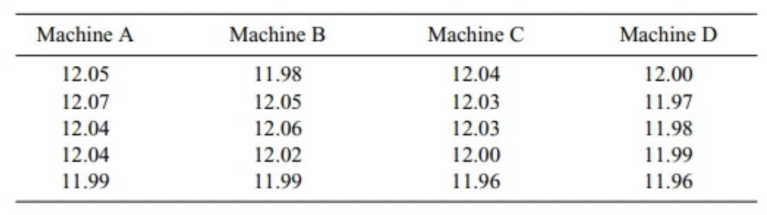

State null and alternative hypothesis and test whether the performance of machines is
different at the 5% level. If there is a difference, find out which machines are different

In [1]:
# As long as one of the two dimensions is a continuous variable, we should use ANOVA.

#### H0: All performance means are equal (μ1 = μ2 = μ3 = ... = μc) - (no variation in means among machines)
#### H1: Not all of the performance means are the same - at least one machine mean is different

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = [[12.05, 11.98, 12.04, 12.00], [11.97, 12.07, 12.04, 12.05], [12.03, 12.06, 12.03, 11.98], 
        [12.04, 12.02, 12.00, 11.99], [11.99, 11.99, 11.96, 11.96]]
df = pd.DataFrame(data, columns = ['Machine_A', 'Machine_B','Machine_C','Machine_D'])
df

,Machine_A,Machine_B,Machine_C,Machine_D
0,12.05,11.98,12.04,12.00
1,11.97,12.07,12.04,12.05
2,12.03,12.06,12.03,11.98
3,12.04,12.02,12.00,11.99
4,11.99,11.99,11.96,11.96


In [4]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Machine_A', 'Machine_B', 'Machine_C', 'Machine_D'])
df_melt.columns = ['index', 'machines', 'value']
df_melt

,index,machines,value
0,0,Machine_A,12.05
1,1,Machine_A,11.97
2,2,Machine_A,12.03
3,3,Machine_A,12.04
4,4,Machine_A,11.99
5,0,Machine_B,11.98
6,1,Machine_B,12.07
7,2,Machine_B,12.06
8,3,Machine_B,12.02
9,4,Machine_B,11.99


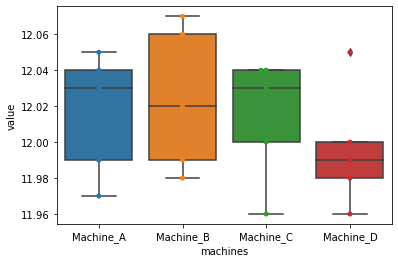

In [5]:
ax = sns.boxplot(x='machines', y='value', data=df_melt)
ax = sns.swarmplot(x="machines", y="value", data=df_melt)
plt.show()

In [6]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['Machine_A'], df['Machine_B'], df['Machine_C'], df['Machine_D'])
print(fvalue, pvalue)

0.54557291666666 0.6581700480498793


In [7]:
# The p value is higher than 0.05, which means we can't reject H0

In [8]:
# or in a vusually better way

# pip install bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(machines)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(machines),3.0,0.002095,0.000698,0.545573,0.65817
Residual,16.0,0.020480,0.001280,NaN,NaN


In [28]:
stats.f.ppf(q=0.95, dfn=3, dfd=16)

3.238871517453585

In [29]:
## Note that the F stat = 0.55 is smaller than Fa  => we can't reject H0

In [10]:
# The same could be done by
'''
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('value ~ C(machines)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
'''

"\nfrom statsmodels.formula.api import ols\nimport statsmodels.api as sm\nmodel = ols('value ~ C(machines)', data=df_melt).fit()\nanova_table = sm.stats.anova_lm(model, typ=2)\nanova_table\n"

#### Finding which machines differ at the 5% level by the Tukey-Kramer Procedure.

In [11]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='machines', anova_model='value ~ C(machines)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Machine_A,Machine_B,0.008,-0.056743,0.072743,0.500,0.900000
1,Machine_A,Machine_C,0.002,-0.062743,0.066743,0.125,0.900000
2,Machine_A,Machine_D,0.020,-0.044743,0.084743,1.250,0.794171
3,Machine_B,Machine_C,0.010,-0.054743,0.074743,0.625,0.900000
4,Machine_B,Machine_D,0.028,-0.036743,0.092743,1.750,0.603618
5,Machine_C,Machine_D,0.018,-0.046743,0.082743,1.125,0.841811


In [12]:
# The test suggests that all  pairwise comparisons for machines confirm the null hypothesis (p < 0.05) - there is no difference.

In [13]:
'''
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_melt['value'],
                          groups=df_melt['machines'],
                          alpha=0.05)
print(tukey)
'''

"\nfrom statsmodels.stats.multicomp import pairwise_tukeyhsd\ntukey = pairwise_tukeyhsd(endog=df_melt['value'],\n                          groups=df_melt['machines'],\n                          alpha=0.05)\nprint(tukey)\n"

#### Testing ANOVA assumptions

- Randomness and Independence
- Normality
- Homogeneity of Variance

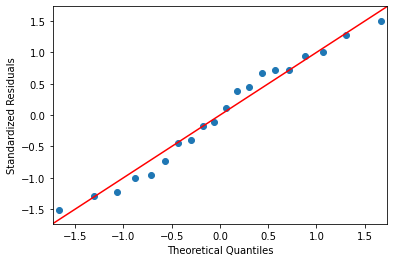

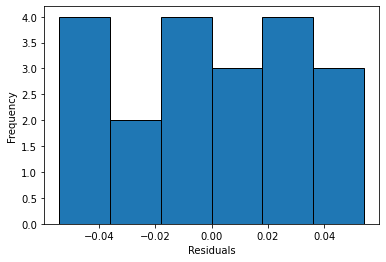

In [14]:
# QQ-plot
import statsmodels.api as sm
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed.

In the histogram, the distribution does not look like normal so let's also do a Shapiro-Wilk test to cheack the normality.

In [15]:
w, pvalue = stats.shapiro(res.anova_std_residuals)
print(w, pvalue)

0.9567469358444214 0.4810813367366791


In [16]:
# As p_value is 0.48, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

Levene’s test to check the Homogeneity of variances

In [17]:
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='machines')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.1623
1,Degrees of freedom (Df),3.0000
2,p value,0.9201


Since the p-value is greater than 0.05 there is insufficient evidence of a difference in the variances.

### Exercise 2

As the price of oil rises, there is increased worldwide interest in alternate sources of energy. A Financial Times/Harris Poll surveyed people in six countries to assess attitudes toward a variety of alternate forms of energy (Harris Interactive website, February 27, 2008). The data in the following table are a portion of the poll’s findings concerning whether people favor or oppose the building of new nuclear power plants. The level of significance is 5%.

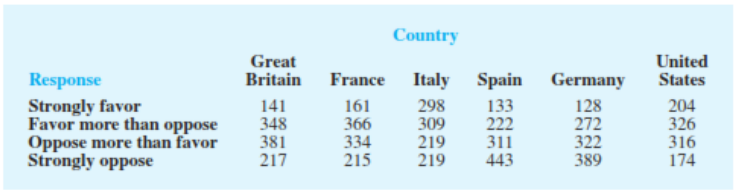

In [18]:
data = [['Stronlgly favor', 141, 161, 298, 133, 128, 204], ['Favor more than oppose', 348, 366, 309, 222, 272, 326], 
        ['Oppose more than favor', 381, 334, 219, 311, 322, 316], ['Strongly oppose', 217, 215, 219, 443, 389, 174]]
df = pd.DataFrame(data, columns = ['Response','GB', 'France','Italy','Spain', 'Germany', 'US'])
df = df.set_index('Response')
df

,GB,France,Italy,Spain,Germany,US
Response,,,,,,
Stronlgly favor,141,161,298,133,128,204
Favor more than oppose,348,366,309,222,272,326
Oppose more than favor,381,334,219,311,322,316
Strongly oppose,217,215,219,443,389,174


In [19]:
# As long as both dimensions are categorical variables, we should use Chi2 test.

#### State Null and alternative hypotheses to test whether people’s attitude toward building new nuclear power plants is independent of country. 

H0: The country and Response are independent (i.e., there is no relationship between them)

H1: The country and Response are dependent (i.e., there is a relationship between them)

#### Fill in empty parts of the Contingency Table with Expected Frequencies.

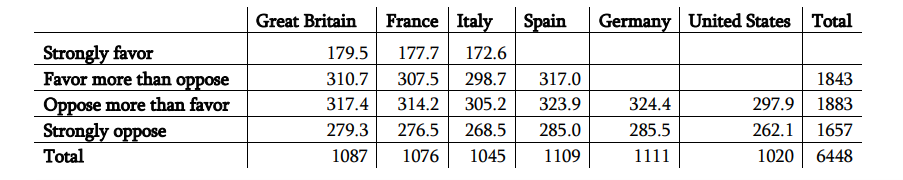

In [20]:
# Spain - Strongly favor
a = df['Spain'].sum()*df.iloc[0].sum()/df.sum().sum()

# Germany - Strongly favor
b = df['Germany'].sum()*df.iloc[0].sum()/df.sum().sum()

# US - Strongly favor
c = df['US'].sum()*df.iloc[0].sum()/df.sum().sum()

# Germany - Favor more than oppose
d = df['Germany'].sum()*df.iloc[1].sum()/df.sum().sum()

# US - Favor more than oppose
e = df['US'].sum()*df.iloc[1].sum()/df.sum().sum()

In [21]:
data1 = [['Stronlgly favor', 179.5, 177.7, 172.6, a, b, c], ['Favor more than oppose', 310.7, 307.5, 298.7, 317, d,e], 
        ['Oppose more than favor', 317.4, 314.2, 305.2, 323.9, 324.4, 297.9], 
        ['Strongly oppose', 279.3, 276.5, 268.5, 285, 285.5, 262.1]]
df1 = pd.DataFrame(data1, columns = ['Response','GB', 'France','Italy','Spain', 'Germany', 'US'])
df1 = df1.set_index('Response')
df1

,GB,France,Italy,Spain,Germany,US
Response,,,,,,
Stronlgly favor,179.5,177.7,172.6,183.170751,183.501086,168.470844
Favor more than oppose,310.7,307.5,298.7,317.000000,317.551644,291.541563
Oppose more than favor,317.4,314.2,305.2,323.900000,324.400000,297.900000
Strongly oppose,279.3,276.5,268.5,285.000000,285.500000,262.100000


#### Show the steps you have taken to test the hypothesis: State your decision and decision rule.

We are almost there, even no need of a library. The decision rule is to calculate the Chi2 stat with the below formula and if 
Chi2(stat) > Chi2(a): df = (r – 1)(c – 1), then we reject H0, otherwise we do not reject H0

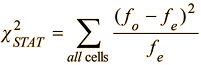

In [22]:
sum = 0
for i in range(0, len(df.index)):
    for j in range(0, len(df1.columns)):
        sum = sum + ((df.values[i,j]-df1.values[i,j])**2)/df1.values[i,j]
sum

425.39289797118

In [23]:
# Chi2(a) for 0.05 significance and df = 3*5 = 15 is 21.026, => we reject the H0.

In [24]:
# automated version

from scipy.stats import chi2_contingency
  
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.1333809459453315e-81
Dependent (reject H0)


In [25]:
'''
from scipy.stats import chi2_contingency,chisquare

data = [[141, 161, 298, 133, 128, 204], [348, 366, 309, 222, 272, 326], 
        [381, 334, 219, 311, 322, 316], [217, 215, 219, 443, 389, 174]]

stat, p, dof, expected = chi2_contingency(data)
print('stat: ', stat)
print('p value: ', p)
print('degree of freedom: ', dof)
print('expected frequencies \n', expected)

stats.chi2.ppf(1-.05, df=1)
'''

"\nfrom scipy.stats import chi2_contingency,chisquare\n\ndata = [[141, 161, 298, 133, 128, 204], [348, 366, 309, 222, 272, 326], \n        [381, 334, 219, 311, 322, 316], [217, 215, 219, 443, 389, 174]]\n\nstat, p, dof, expected = chi2_contingency(data)\nprint('stat: ', stat)\nprint('p value: ', p)\nprint('degree of freedom: ', dof)\nprint('expected frequencies \n', expected)\n\nstats.chi2.ppf(1-.05, df=1)\n"

The Marascuilo Procedure - Used when the null hypothesis of equal proportions is rejected.

In [26]:
# Could not find how to perform the procedure in Python. Not discussed in hands-on session as well. But still, it's interesting.

#### Provide your findings within the context of the problem.

In [27]:
# The test results show that people’s attitude toward building new nuclear power plants is dependent of country.